# Знакомство с фреймворком Streamlit

## Содержание

*   Что такое Streamlit?
*   Установка
*   Первое приложение
*   Виджеты
*   Второе приложение
*   Деплой
*   Дополнительные материалы

## Что такое Streamlit?

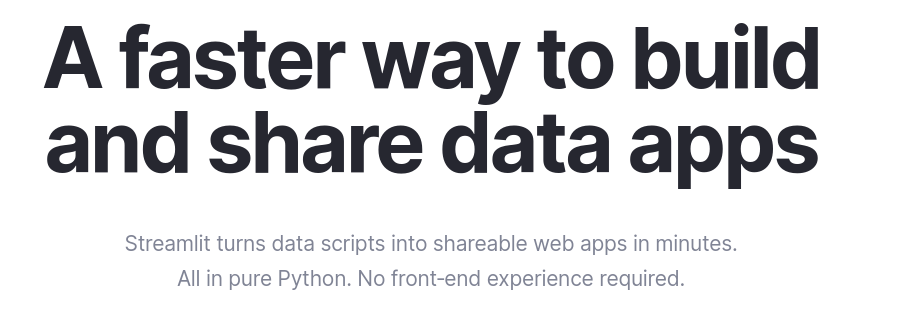

[Streamlit](https://streamlit.io/) — **максимально** простой фреймворк с открытым кодом. Он позволяет **очень быстро** и **используя только Python** создавать веб-приложения.


**Преимущества**

*   Совместим с основными библиотеками Python (NumPy, Pandas, Scikit Learn и т.д.)
*   Скорость разработки
*   Разработка интерфейса приложения исключительно на Python
*   Легкий деплой


## Установка

In [ ]:
# установка фреймворка
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.3 MB/s eta 0:00:00


### Запуск в Google Colab

In [ ]:
!npm install -g npm

/tools/node/bin/npm -> /tools/node/lib/node_modules/npm/bin/npm-cli.js
/tools/node/bin/npx -> /tools/node/lib/node_modules/npm/bin/npx-cli.js
npm WARN notsup Unsupported engine for npm@9.8.1: wanted: {"node":"^14.17.0 || ^16.13.0 || >=18.0.0"} (current: {"node":"14.16.0","npm":"6.14.8"})
npm WARN notsup Not compatible with your version of node/npm: npm@9.8.1

+ npm@9.8.1
added 108 packages from 31 contributors, removed 293 packages and updated 141 packages in 7.327s


In [ ]:
!npm install localtunnel

npm WARN cli npm v9.8.1 does not support Node.js v14.16.0. This version of npm supports the following node versions: `^14.17.0 || ^16.13.0 || >=18.0.0`. You can find the latest version at https://nodejs.org/.

added 22 packages in 1s

3 packages are looking for funding
  run `npm fund` for details


In [ ]:
%%writefile app.py

import streamlit as st

st.write('Hello, AI Student! :pig:')

Writing app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npm WARN cli npm v9.8.1 does not support Node.js v14.16.0. This version of npm supports the following node versions: `^14.17.0 || ^16.13.0 || >=18.0.0`. You can find the latest version at https://nodejs.org/.
your url is: https://bitter-bikes-move.loca.lt
^C


### Запуск локально

In [ ]:
# проверка что все работает
!streamlit hello

Если проблем на этом этапе нет, то можно перейти по локальному адресу `http://localhost:8501`, чтобы посмотреть демо, которое подготовили разработчики Streamlit

## Первое приложение

Напишем приложение, которое расчитывает индекс массы тела

In [ ]:
# импортируем библиотеку streamlit
import streamlit as st

# заголовок приложения
st.title('Калькулятор индекса массы тела (ИМТ)')

# СЧИТЫВАЕМ ВЕС
weight = st.number_input("Введите ваш вес (в килограммах)")

# СЧИТЫВАЕМ РОСТ
# используем radio button, чтобы указать единицы измерения
status = st.radio('Укажите единицы измерения роста: ', ('см', 'м', 'футы'))

# сравниваем различные статусы для единиц измерения роста
if (status == 'см'):
    # считываем значение роста в сантиметрах
    height = st.number_input('Сантиметры')

    try:
        bmi = weight / ((height / 100) ** 2)
    except:
        st.text("Введите ваш рост")

elif (status == 'м'):
    # считываем значение роста в метрах
    height = st.number_input('Метры')

    try:
        bmi = weight / (height ** 2)
    except:
        st.text("Введите ваш рост")

else:
    # считываем значение роста в футах
    height = st.number_input('Футы')

    # 1 meter = 3.28
    try:
        bmi = weight / (((height / 3.28)) ** 2)
    except:
        st.text("Введите ваш рост")

# проверяем нажата кнопка или нет
if (st.button('Рассчитать ИМТ')):

    # напечатать значение ИМТ
    st.text(f"Ваш ИМТ равен {bmi:.2f}")

    # интерпретация ИМТ
    if (bmi < 16):
        st.error("Выраженный дефицит массы тела")
    elif (bmi >= 16 and bmi < 18.5):
        st.warning("Недостаточная (дефицит) масса тела")
    elif (bmi >= 18.5 and bmi < 25):
        st.success("Норма")
    elif (bmi >= 25 and bmi < 30):
        st.warning("Избыточная масса тела")
    elif (bmi >= 30):
        st.error("Любитель вкусняшек")


## Виджеты

In [ ]:
# импортируем библиотеку streamlit
import streamlit as st

# импортируем библиотеку pandas
import pandas as pd

### Работа с текстом

In [ ]:
# Название
st.title("Песочница")

# Заголовок
st.header("Это заголовок")

# Подзаголовок
st.subheader("Это подзаголовок")

# Подзаголовок
st.subheader("Это подзаголовок")

# Текст
st.text("Просто текст")

In [ ]:
# Можно передавать параметры!
st.write(pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40],
}))

### Информационные сообщения

In [ ]:
st.success("Success")
st.info("Information")
st.warning("Warning")
st.error("Error")

### Работа с изображениями

In [ ]:
# импортируем функцию Image, чтобы открывать картинки
from PIL import Image

# загружаем картинку
img = Image.open("streamlit.png")

# отображаем картинку используя streamlit
st.image(img, width=200)

### Checkbox

In [ ]:
# проверяем выбран ли чекбокс
if st.checkbox("Show/Hide"):
    # показываем текст если чекбокс выбран
    st.text("Showing the widget")

### Radio Button

In [ ]:
status = st.radio("Select Gender: ", ('Male', 'Female'))

if (status == 'Male'):
    st.success("Male")
else:
    st.success("Female")

## Второе приложение

In [ ]:
# импорт библиотек
import streamlit as st
import pandas as pd
import plotly_express as px

PATH = "https://www.dropbox.com/scl/fi/226nfwteim6x2x7q0c36a/football.csv?dl=1&rlkey=cd2t0odbqr8g0yxnnul51mykb"

df = st.cache_data(pd.read_csv)(PATH)

clubs = st.sidebar.multiselect('Выберите клуб', df['Club'].unique())
nationalities = st.sidebar.multiselect('Укажите национальность игроков', df['Nationality'].unique())

new_df = df[(df['Club'].isin(clubs)) & (df['Nationality'].isin(nationalities))]
st.write(new_df)

# строим графики используя plotly express
fig = px.scatter(new_df, x='Overall', y='Age', color='Name')

# рисуем!
st.plotly_chart(fig)


## Деплой

*   Локальный запуск
*   Docker контейнер
*   Streamlit Cloud
*   Heroku
*   Hugging Face Spaces

### Streamlit Cloud



*   Создаем новый репозиторий на GitHub  
*   Загружаем проект
*   Создаем аккаунт в [Streamlit Cloud](https://streamlit.io/cloud)
*   Авторизуемся в Streamlit Cloud
*   Создаем новое приложение в Streamlit Cloud и подключаем GitHub-репозиторий
*   Deploy!


## Полезные ссылки
*   [Оформление задачи Титаник на Streamlit](https://github.com/evgpat/streamlit_demo)
*   [Документация Streamlit](https://docs.streamlit.io/)
*   [Блог о Streamlit](https://blog.streamlit.io/)

# Курсы сообщества AI Education

**Интенсивы**

---
[Разведочный анализ данных](https://stepik.org/a/177213)

На интенсиве вы познакомитесь с основными и продвинутыми подходами анализа данных:
  * Научитесь исследовать данные при помощи современных библиотек (NumPy, Pandas, Polars, Matplotlib, Seaborn)
  * Обучите свою первую модель машинного обучения
  * Построите интерактивный дашборд при помощи инструмента ExplainerDashboard
  * Начнете использовать такие инструменты разработчика как Git и Docker


[Линейные модели и их презентация](https://stepik.org/a/177215)  

В курсе вы не только разберете теоретическую сторону предмета, но и узнаете как использовать модели на практике:
  * Будете оценивать качество моделей регрессии и классификации
  * Проходить все этапы задачи ML: от разведочного анализа до получения прогноза и его интерпретации
  * Cтроить интерактивные дашборды при помощи библиотеки Streamlit
  * Cоздавать веб-сервисы с использованием фреймворка FastApi


В каждом интенсиве по 9 вебинаров (4 по анализу данных / 4 по разработке / финальный с подведением итогов и защитой проектов по желанию).

**Курсы**

---

[Практический Machine Learning](https://stepik.org/a/125501)

  * Курс посвящен изучению всех основных задач и подходов в машинном обучении. Курс дает как теорию методов, так и обширную практику.
  * За 16 недель курса вы пройдете путь практически с нуля в машинном обучении до уверенного владения основными алгоритмами и подходами.

[Прикладные задачи машинного обучения](https://stepik.org/a/175967)

* В курсе подробно разобраны следующие темы:

  * построение рекомендательных систем
  * анализ временных рядов
  * продвинутые методы интерпретации ML-моделей
  * AutoML

* Курс находится в процессе наполнения, в нем будут появляться новые актуальные и прикладные в ML-темы.